In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import utils
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import numpy as np

In [13]:
# #read the sdf file of 10 predictable molecules
# ligands_996 =Chem.SDMolSupplier('ndonor.sdf')
# #create the ecfp fingerprint
# #x is the input, 2 is the radius
# morgan_996=[AllChem.GetMorganFingerprintAsBitVect(x,2,nBits=1024) for x in ligands_996]
# efp_996=np.array(morgan_996)
# efp_996.shape

In [14]:
# # #save the ecfp in a csv file
# pd.DataFrame(efp_996).to_csv('ecfp_10.csv')

In [15]:
# #define a function for normalizing in vertical order
# def col_normalize(X):
#     X1=np.matrix(X)
#     X_1=X1.transpose()
#     X_2=np.array(X_1)
#     X_3=preprocessing.normalize(X_2,norm="l2")
#     X_4=np.matrix(X_3)
#     X_5=X_4.transpose()
#     X_6=np.array(X_5)
#     return X_6

In [16]:
#read the file containing the ecfp and isomer(1 or 2) and normalize
input=pd.read_csv('input_996.csv')#Put address
efp_996=pd.read_csv('ecfp_996.csv')
efp_996=np.array(efp_996)
Charge=input[['Charge_acid']].copy()
Isomer=input[['Isomer']].copy()
X_996=np.concatenate((efp_996,Charge),axis=1)
X_996=np.concatenate((X_996,Isomer),axis=1)
print(len(efp_996))
#Isomer_positive=input_positive[['Isomer']].copy()
#X_996=np.concatenate((efp_996,Isomer_positive),axis=1)
#X_785=col_normalize(X_785)
X_996.shape

996


(996, 1026)

In [17]:
#assign the Hammett constants to Y
Y_996=input[['Hammett Constant']].copy()
Y_996=np.array(Y_996)

In [18]:
efp_ndonor=pd.read_csv('ecfp_10.csv')
efp_ndonor=np.array(efp_ndonor)
X_ndonor=efp_ndonor
X_ndonor.shape

(10, 1026)

In [19]:
#create null list to record values later
MSE_boot=np.zeros((1000),dtype= float)
#Index= np.zeros((1000,662),dtype=int)
Y_prediction_train=np.zeros((996,1000),dtype=float)
#Y_prediction_test=np.zeros((334,1000),dtype=float)
Y_pred_all=np.zeros((996,1000),dtype=float)
Y_target_train=np.zeros((996,1000),dtype=float)
#Y_target_test=np.zeros((334,1000),dtype=float)
Y_prediction_ndonor=np.zeros((10,1000),dtype=float)
MSE_boot=np.zeros((1000),dtype= float)
print(Y_target_train[0].shape)

(1000,)


In [20]:
regr = RandomForestRegressor(n_estimators=1, max_depth=None, random_state=None,bootstrap=0)

In [21]:
# list(X_996).index("infinity")

In [22]:
for m in range(0,1000):
    #positive part
    index_996=np.random.choice(996, size=996, replace=1)
    X_train=X_996[index_996]
    Y_train=Y_996[index_996]
    X_test=np.delete(X_train,index_996,axis=0)
    Y_test=np.delete(Y_train,index_996,axis=0)
    #Y_positive_left.shape
    #negative part
#     index_negative=np.random.choice(183, size=183, replace=1)
#     X_121=X_183[index_negative]
#     Y_121=Y_negative[index_negative]
#     X_negative_left=np.delete(X_183,index_negative,axis=0)
#     Y_negative_left=np.delete(Y_negative,index_negative,axis=0)
#     #neutral part
#     index_zeros=np.random.choice(28, size=28, replace=1)
#     X_18=X_28[index_zeros]
#     Y_18=Y_zeros[index_zeros]
#     X_zeros_left=np.delete(X_28,index_zeros,axis=0)
#     Y_zeros_left=np.delete(Y_zeros,index_zeros,axis=0)
#     #target
#     X_662=np.concatenate((X_523,X_121,X_18),axis=0)
#     Y_662=np.concatenate((Y_523,Y_121,Y_18),axis=0)
#     X_662, Y_662 = shuffle(X_662, Y_662)
#     #X_662.shape
#     #print(Y_662.shape)
#     #left
#     X_left=np.concatenate((X_positive_left,X_negative_left,X_zeros_left),axis=0)
#     Y_left=np.concatenate((Y_positive_left,Y_negative_left,Y_zeros_left),axis=0)
#     Y_target_train[:,m]=Y_662.ravel()
#     #Y_target_test[:,m]=Y_left.ravel()
#     #Y_left.shape
#     #RF
    X_resample= X_train
    Y_resample= Y_train
    regr.fit(X_resample, Y_resample.ravel())
    Y_pred_train=regr.predict(X_resample)    #Fit RF on training set
    Y_pred_test=regr.predict(X_test)        #Fit RF on testing set
    Y_pred_all_each=regr.predict(X_996)     # Fit RF on complete database
    Y_pred_all[:,m]=Y_pred_all_each
    #Y_prediction_test[:,m]=Y_pred_left
    Y_prediction_train[:,m]=Y_pred_train
    #Y_pred_all=regr.predict(X_996)
    Y_pred_ndonor=regr.predict(X_ndonor)    # Fit RF on ndonor
    Y_prediction_ndonor[:,m]=Y_pred_ndonor
    MSE_train=mean_squared_error(Y_resample, Y_pred_train)
    MSE_test=mean_squared_error(Y_test, Y_pred_test)
    MSE_boot[m]=(MSE_train*0.368)+(0.632)*(MSE_test)

In [23]:
Y_prediction_mean=Y_pred_all.mean(axis=1)
Y_prediction_mean

array([ 2.85170000e-01,  3.24775000e-02,  7.87300000e-02, -4.38010000e-01,
       -5.22620000e-01,  3.71520000e-01,  4.63450000e-01,  2.93500000e-01,
        2.23610000e-01,  5.49400000e-01,  5.97230000e-01,  6.99240000e-01,
        7.54380000e-01,  3.19960000e-01,  3.46290000e-01,  2.78620000e-01,
        2.77870000e-01,  4.38710000e-01,  5.18080000e-01,  1.78120000e-01,
        1.03860000e-01,  3.93930000e-01,  4.18510000e-01,  4.04400000e-01,
        5.07900000e-01,  4.50870000e-01,  4.92540000e-01,  4.55760000e-01,
        5.13300000e-01,  3.20063333e-01,  3.60010000e-01,  4.40530000e-01,
        5.19270000e-01,  5.67300000e-02,  5.99000000e-03,  1.14370000e-01,
        1.12150000e-01, -6.76600000e-02, -9.50400000e-02, -6.73300000e-02,
       -1.34670000e-01, -6.30300000e-02,  2.23020000e-01, -1.25450000e-01,
        1.17650000e-01,  1.17230000e-01,  1.52380000e-01,  1.51880000e-01,
        2.43400000e-02, -8.32000000e-02,  1.25220000e-01,  1.20480000e-01,
        9.33800000e-02,  

In [24]:
Y_prediction_std=Y_pred_all.std(axis=1)
Y_prediction_std

array([0.03083133, 0.08776812, 0.07209083, 0.13627597, 0.2604468 ,
       0.0828498 , 0.08494114, 0.13935692, 0.10598711, 0.08713346,
       0.08937576, 0.1229635 , 0.11701545, 0.06797057, 0.09483215,
       0.09040407, 0.10359326, 0.06278563, 0.06263955, 0.10997666,
       0.13258017, 0.07144967, 0.10287021, 0.05453843, 0.0496688 ,
       0.02332259, 0.0225244 , 0.04180936, 0.02727471, 0.06407085,
       0.09351096, 0.04834273, 0.04985546, 0.08578582, 0.09140361,
       0.04838805, 0.0721074 , 0.11094739, 0.09847131, 0.02326308,
       0.02911857, 0.05573795, 0.08397904, 0.06453834, 0.0680263 ,
       0.09341535, 0.04356071, 0.08169985, 0.09820674, 0.11010795,
       0.04300874, 0.0522912 , 0.04727976, 0.0755212 , 0.06230669,
       0.07699457, 0.12937202, 0.12211508, 0.07550482, 0.08308239,
       0.03850058, 0.0449994 , 0.06154074, 0.08725918, 0.07712667,
       0.09973156, 0.06251745, 0.07292299, 0.08507667, 0.09833548,
       0.1168939 , 0.08369229, 0.10594572, 0.03875089, 0.06109

In [25]:
sigma1=Y_prediction_std*2.03/(1000**0.5)
#sigma1.min()

In [26]:
MSE_all=mean_squared_error(Y_prediction_mean,Y_996)
MSE_all

0.0028732026050674584

In [27]:
#n_donor with NH2
Y_ndonor_mean=Y_prediction_ndonor.mean(axis=1)
print("       NOC,      NC,      N,       NCF3,      NNO2")
Y_ndonor_mean

       NOC,      NC,      N,       NCF3,      NNO2


array([0.01162, 0.01191, 0.05337, 0.52039, 0.54984, 0.36099, 0.44168,
       0.47698, 0.45157, 0.47414])

In [28]:
Y_ndonor_std=Y_prediction_ndonor.std(axis=1)
Y_ndonor_std

array([0.12547978, 0.11010382, 0.07364471, 0.05816483, 0.17620435,
       0.23493897, 0.16053902, 0.12012443, 0.24639691, 0.19891923])

In [33]:
ndonor=np.zeros((2,10),dtype=float)
ndonor[0]=Y_ndonor_mean
ndonor[1]=Y_ndonor_std
# ndonor=np.concatenate((Y_ndonor_mean,Y_ndonor_std),axis=1)
pd.DataFrame(ndonor.T).to_csv('ndonor_ms.csv')#Put address
ndonor.T

array([[0.01162   , 0.12547978],
       [0.01191   , 0.11010382],
       [0.05337   , 0.07364471],
       [0.52039   , 0.05816483],
       [0.54984   , 0.17620435],
       [0.36099   , 0.23493897],
       [0.44168   , 0.16053902],
       [0.47698   , 0.12012443],
       [0.45157   , 0.24639691],
       [0.47414   , 0.19891923]])

In [29]:
sigma2=Y_ndonor_std*2.03/(1000**0.5)
sigma2

array([0.00805508, 0.00706803, 0.00472757, 0.00373385, 0.0113113 ,
       0.01508173, 0.01030568, 0.0077113 , 0.01581726, 0.01276947])

In [30]:
pd.DataFrame(Y_prediction_mean).to_csv('Y_prediction_mean.csv')#Put address

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 35}

matplotlib.rc('font', **font)
# filename = 'Y_all.csv'
# df = pd.read_csv(filename)
# #df1= pd.read_csv('FEC_10000.csv')
# df.columns#, df1.columns

#Plot parameters

xlow = -1.5
xhigh = 2.5


x=input['Hammett Constant']
y=Y_prediction_mean
y_err=[Y_prediction_std,Y_prediction_std]

/Users/blair/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


Text(-1.4, 1.9, 'Test set: 992 data points')

/Users/blair/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


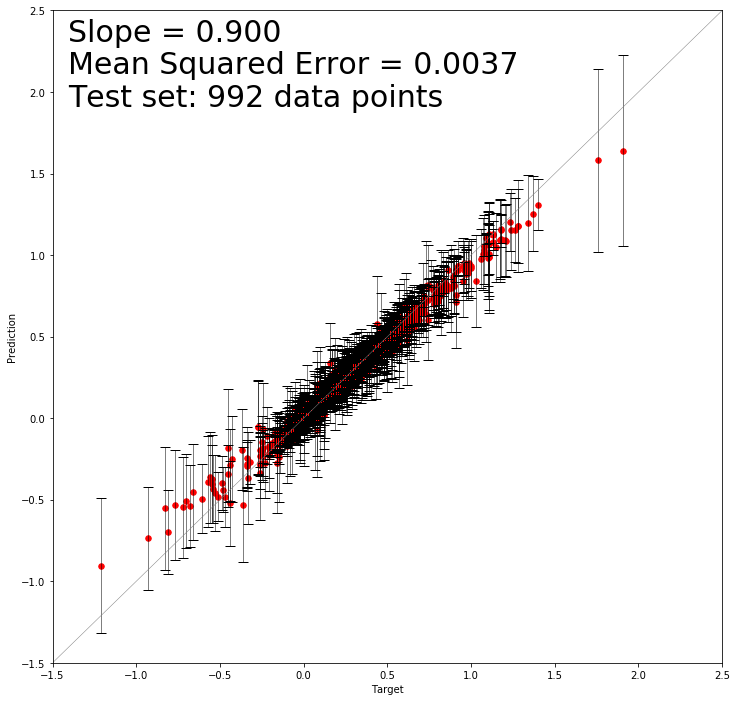

In [32]:
def scatplot(x_data, y_data, error_data, x_label, y_label, title):
    _, ax = plt.subplots(figsize=(12,12))
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.scatter(x_data, y_data, color = 'red',s=30)
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    ax.errorbar(x_data, y_data,  
                yerr = error_data, 
                color = 'black', 
                ls = 'none', 
                lw = 0.5, capsize = 5)
    plt.xlim(xlow,xhigh)
    plt.ylim(xlow,xhigh)
    ax.plot([xlow, xhigh], [xlow, xhigh], color='gray', linestyle='-', linewidth=0.5)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title,fontsize=22.5)
    

# Call the function to create plot
scatplot(x_data = x, 
         y_data = y,
         error_data = y_err,
         x_label = 'Target',
         y_label = 'Prediction',
         title = '')

plt.annotate('Slope = 0.900', 
             xy=(-1.4, 2.3),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
plt.annotate('Mean Squared Error = 0.0037', 
             xy=(-1.4, 2.1),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
plt.annotate('Test set: 992 data points', 
             xy=(-1.4, 1.9),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
        
#Plotting prediction for inputs without 
#plt.scatter(x1, y1, color = 'green',s=30)
#plt.errorbar(x1, y1,yerr = y1_err, color = 'k', ls = 'none', lw = 0.5, capsize = 5)
#plt.show()